# Neural network with a DenseNet structure

The main objective for this code is to create neural network that uses DenseNet layesr to build dense neural netowrk using functional interface. The DenseNet architesture layer schematic:

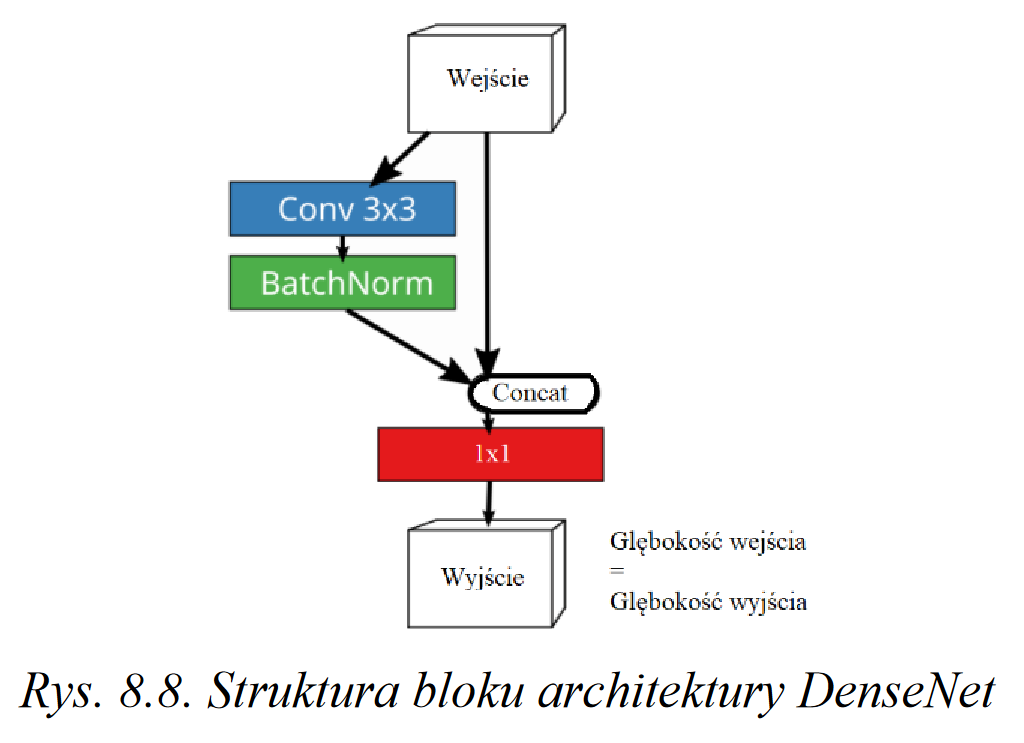

Then the tensors inside naural network model are trained and tested for accuracy and loss metrics

In [ ]:
# loading the data
from keras.datasets import mnist
import numpy as np
import pandas as pd

# Loading the MNIST dataset
data = mnist.load_data()

# Separating training and testing data
X_train, y_train = data[0][0], data[0][1]
X_test, y_test = data[1][0], data[1][1]

# Expanding dimensions for compatibility with the neural network
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# One-hot encoding the categorical labels for training and testing
y_train = pd.get_dummies(pd.Categorical(y_train)).values
y_test = pd.get_dummies(pd.Categorical(y_test)).values


11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Adding a DenseNet block
from keras.layers import Conv2D, BatchNormalization, Add, Activation
from keras.layers import concatenate

def block_DenseNet(tensor):
  filter_cnt = 32
  skip_tensor = tensor  # Copying the tensor that will be skipped
  output_tensor = Conv2D(filter_cnt, (3, 3), padding='same')(tensor)
  output_tensor = BatchNormalization(axis=3)(output_tensor)
  output_tensor = concatenate([output_tensor, skip_tensor])
  output_tensor = Conv2D(filter_cnt, (1, 1), strides=(2, 2))(output_tensor)
  return output_tensor

In [ ]:
# Creating a simple network with a specified number of ResNet blocks
from keras.backend import softmax
from keras.layers import Flatten, Dense, Input
from keras.models import Model

# Creating a network containing the given number of ResNet blocks
num_layers = 3
output_tensor = input_tensor = Input(X_train.shape[1:])
for i in range(num_layers):
  output_tensor = block_DenseNet(output_tensor)

output_tensor = Flatten()(output_tensor)
output_tensor = Dense(10, activation='softmax')(output_tensor)
model3 = Model(inputs=input_tensor, outputs=output_tensor)
model3.compile(loss='categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [ ]:
pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2631 sha256=7bc73dbd366069d54e032ff358ab8bd5961328b14f4d21b879db08ad0ffae9b3
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


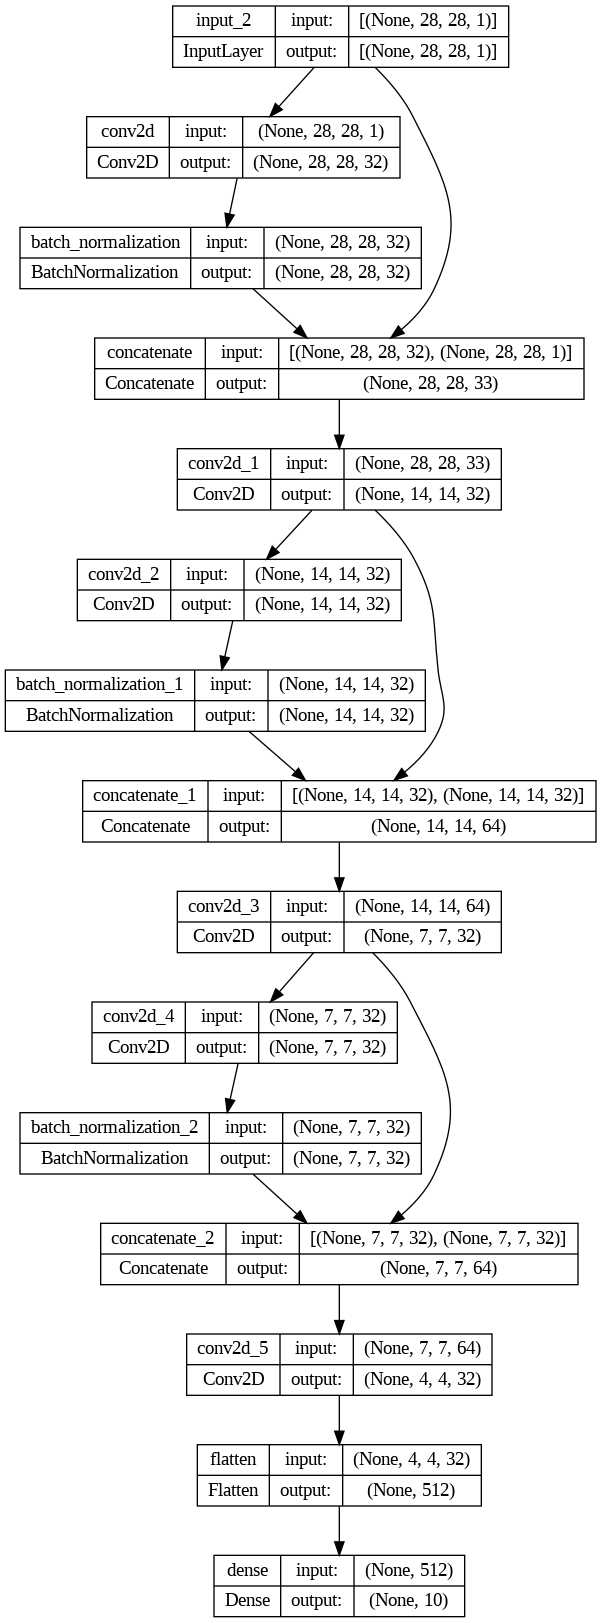

In [ ]:
# Network structure visualization
from tensorflow.keras.utils import plot_model
plot_model(model3, show_shapes=True)

Epoch 1/10
1875/1875 [==============================] - 96s 50ms/step - loss: 0.5243 - accuracy: 0.8542 - val_loss: 0.3303 - val_accuracy: 0.9071
Epoch 2/10
1875/1875 [==============================] - 91s 49ms/step - loss: 0.3492 - accuracy: 0.9000 - val_loss: 0.3465 - val_accuracy: 0.8985
Epoch 3/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.3320 - accuracy: 0.9045 - val_loss: 0.3061 - val_accuracy: 0.9119
Epoch 4/10
1875/1875 [==============================] - 90s 48ms/step - loss: 0.3225 - accuracy: 0.9084 - val_loss: 0.3092 - val_accuracy: 0.9103
Epoch 5/10
1875/1875 [==============================] - 89s 48ms/step - loss: 0.3159 - accuracy: 0.9102 - val_loss: 0.2954 - val_accuracy: 0.9147
Epoch 6/10
1875/1875 [==============================] - 87s 46ms/step - loss: 0.3092 - accuracy: 0.9132 - val_loss: 0.2985 - val_accuracy: 0.9178
Epoch 7/10
1875/1875 [==============================] - 88s 47ms/step - loss: 0.3051 - accuracy: 0.9127 - val_loss: 0.2831 -

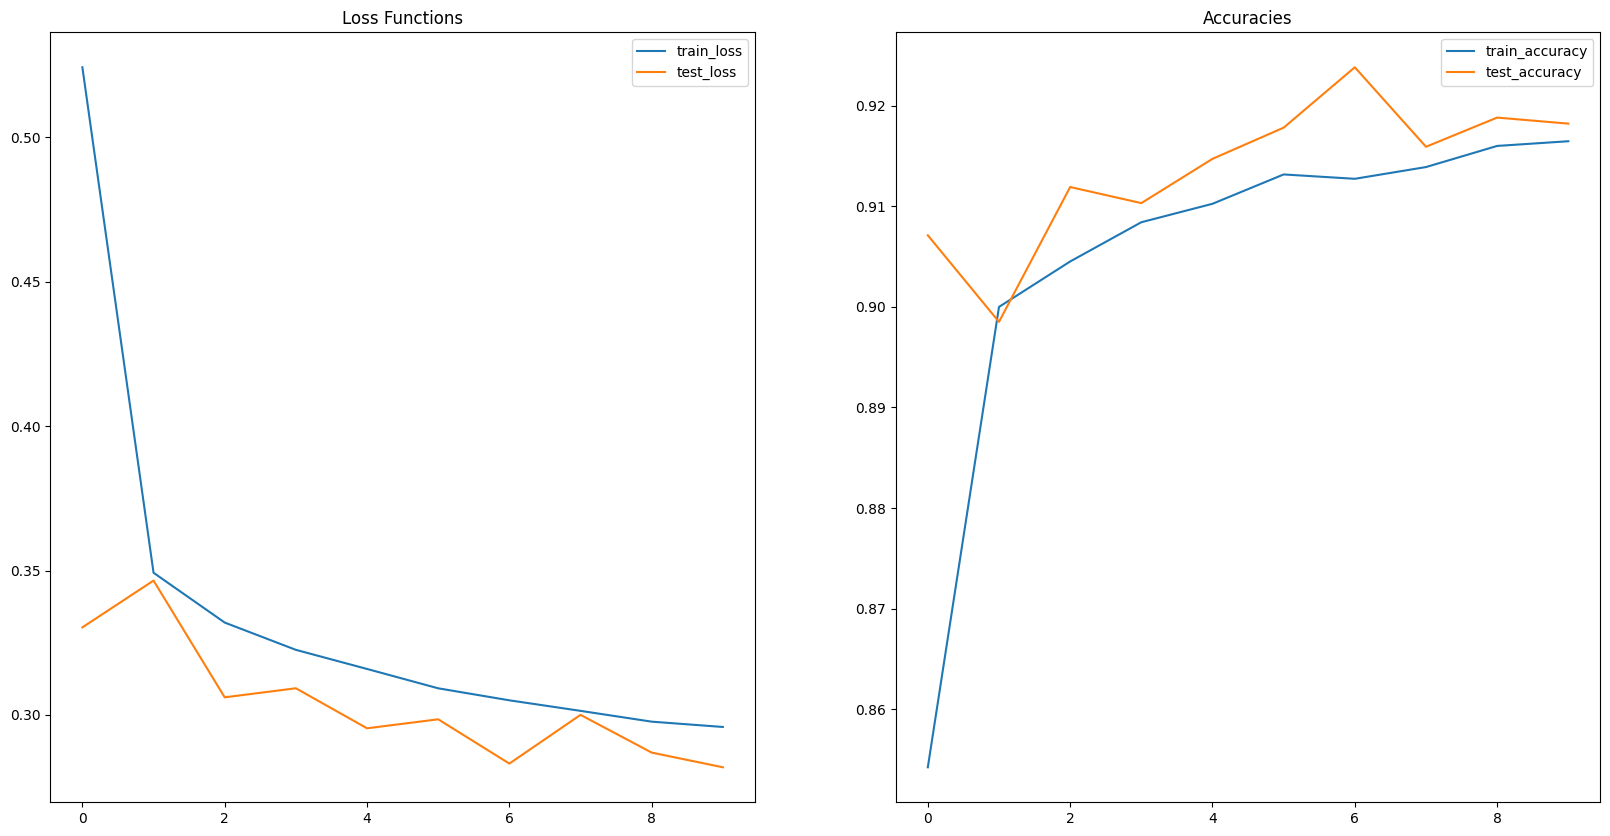

In [ ]:
# Plotting loss and accuracy curves
# Function to plot the learning curve for a given model
def generateNetworkLearningCurve(model, epochs=10):
    from matplotlib import pyplot as plt
    history = model.history.history
    train_loss = history['loss']
    test_loss = history['val_loss']
    train_accuracy = history['accuracy']
    test_accuracy = history['val_accuracy']
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    epochs = np.arange(0, epochs)
    ax[0].plot(epochs, train_loss, label='train_loss')
    ax[0].plot(epochs, test_loss, label='test_loss')
    ax[0].set_title('Loss Functions')
    ax[0].legend()
    ax[1].set_title('Accuracies')
    ax[1].plot(epochs, train_accuracy, label='train_accuracy')
    ax[1].plot(epochs, test_accuracy, label='test_accuracy')
    ax[1].legend()


# Training the model
history = model3.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

generateNetworkLearningCurve(model3, 10)  # Generating learning curve for model2 with 10 epochs